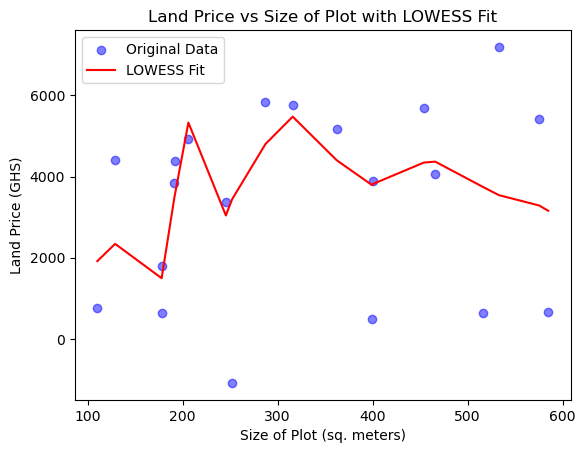

Predicted land price for input [287.27005942  20.29632237   2.09834411  12.77354579]: 4976.68555887273


In [18]:
# Let's first load the dataset to check its structure and then simulate a new dataset with some non-linearity.
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Load the dataset from the provided CSV file
file_path = 'full data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
import numpy as np

# Clean up the 'Land Price (GHS)' column by removing commas and converting to float
data['Land Price (GHS)'] = data['Land Price (GHS)'].replace({',': ''}, regex=True).astype(float)

# Simulate a non-linear version of the dataset
np.random.seed(42)

# Number of samples
num_samples = len(data)

# Simulate the "Size of Plot" feature
size_of_plot = np.random.uniform(100, 600, num_samples)

# Simulate "Distance from Airport" and "Proximity to Main Road" with some randomness
distance_from_airport = np.random.uniform(5, 30, num_samples)
proximity_to_main_road = np.random.uniform(1, 10, num_samples)
proximity_to_city_center = np.random.uniform(5, 25, num_samples)

# Introduce non-linearity in "Land Price"
land_price = (size_of_plot ** 1.2) + (distance_from_airport ** 0.5) * 1000 - (proximity_to_main_road ** 2) * 50 + np.random.normal(0, 2000, num_samples)

# Create a DataFrame for the simulated data
simulated_data = pd.DataFrame({
    'Size of Plot (sq. meters)': size_of_plot,
    'Distance from Airport (km)': distance_from_airport,
    'Proximity to Main Road (km)': proximity_to_main_road,
    'Proximity to City Center (km)': proximity_to_city_center,
    'Land Price (GHS)': land_price
})

# Display the simulated dataset
simulated_data.head()


# Let's focus on the relationship between "Size of Plot" and "Land Price" for the LOWESS model.
# We will use LOWESS to fit a smooth curve to this non-linear data.

# Perform Locally Weighted Regression (LOWESS)
lowess_results = lowess(simulated_data['Land Price (GHS)'], simulated_data['Size of Plot (sq. meters)'], frac=0.3)

# Extract the smoothed values
size_of_plot_smooth = lowess_results[:, 0]
land_price_smooth = lowess_results[:, 1]

# Plot the original data points
plt.scatter(simulated_data['Size of Plot (sq. meters)'], simulated_data['Land Price (GHS)'], color='blue', alpha=0.5, label='Original Data')

# Plot the LOWESS smoothed curve
plt.plot(size_of_plot_smooth, land_price_smooth, color='red', label='LOWESS Fit')

# Add labels and title
plt.xlabel("Size of Plot (sq. meters)")
plt.ylabel("Land Price (GHS)")
plt.title("Land Price vs Size of Plot with LOWESS Fit")
plt.legend()

# Show the plot
plt.show()
# Step 1: Recalculate theta_optimal using the normal equation

# Load features (X) and target (y) from the simulated dataset
X = simulated_data[['Size of Plot (sq. meters)', 'Distance from Airport (km)', 
                    'Proximity to Main Road (km)', 'Proximity to City Center (km)']].values
y = simulated_data['Land Price (GHS)'].values

# Normalize the features (standardization)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add a bias term (intercept) to the normalized features
m = len(y)  # number of examples
X_b = np.c_[np.ones((m, 1)), X_norm]

# Apply the normal equation to find the optimal theta
theta_optimal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Step 2: Make prediction using the new input
new_input = np.array([[287.27005942368123,20.296322368059485,2.0983441136030097,12.77354579378964]])  # Example input

# Normalize the new input based on training data
new_input_norm = (new_input - X_mean) / X_std

# Add bias term to the new input
new_input_b = np.c_[np.ones((new_input_norm.shape[0], 1)), new_input_norm]

# Predict the land price using the optimal theta
predicted_price = new_input_b.dot(theta_optimal)

# Output the predicted price
print(f"Predicted land price for input {new_input[0]}: {predicted_price[0]}")



# Export the simulated data as a CSV file
simulated_data.to_csv('simulated_land_price_data.csv', index=False)
